In [1]:
import asf_search as asf
from uavsar_pytools import UavsarCollection
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
datetime.tod()

In [16]:
collections = ['Grand Mesa, CO','Lowman, CO','Fraser, CO','Ironton, CO', 'Peeler Peak, CO', 'Rocky Mountains NP, CO', 'Silverton, CO', \
    'Telluride, CO', 'Silver City, ID', 'Reynolds Creek, ID', 'Utica, MT','Salt Lake City, UT','Los Alamos, NM','Eldorado National Forest, CA',\
        'Donner Memorial State Park, CA','Sierra National Forest, CA']
non_zero_collections = ['Grand Mesa, CO','Lowman, CO','Fraser, CO','Ironton, CO', 'Peeler Peak, CO', 'Rocky Mountains NP, CO', 'Silverton, CO', \
    'Telluride, CO', 'Silver City, ID', 'Reynolds Creek, ID', 'Utica, MT','Salt Lake City, UT','Los Alamos, NM','Eldorado National Forest, CA',\
        'Donner Memorial State Park, CA','Sierra National Forest, CA']        

In [24]:
for co in non_zero_collections:
    print(co)
    collection = UavsarCollection(collection = co, work_dir='~', dates= ('2019-10-01', 'today'))
    collection.find_urls()
    for i, r in enumerate(collection.results):
        prop = r.properties
        s = prop['startTime']
        e = prop['stopTime']
        if pd.to_datetime(s).month <10 and pd.to_datetime(s).month>4:
            print(s)
        if pd.to_datetime(e).month <10 and pd.to_datetime(e).month>4:
            print(e)
    print('-------------')

Grand Mesa, CO


INFO:uavsar_pytools.uavsar_collection:Found 13 image pairs


-------------
Lowman, CO


INFO:uavsar_pytools.uavsar_collection:Found 17 image pairs


-------------
Fraser, CO


INFO:uavsar_pytools.uavsar_collection:Found 16 image pairs


-------------
Ironton, CO


INFO:uavsar_pytools.uavsar_collection:Found 9 image pairs


-------------
Peeler Peak, CO


INFO:uavsar_pytools.uavsar_collection:Found 4 image pairs


-------------
Rocky Mountains NP, CO


INFO:uavsar_pytools.uavsar_collection:Found 15 image pairs


-------------
Silverton, CO


INFO:uavsar_pytools.uavsar_collection:Found 0 image pairs


-------------
Telluride, CO


INFO:uavsar_pytools.uavsar_collection:Found 0 image pairs


-------------
Silver City, ID


INFO:uavsar_pytools.uavsar_collection:Found 1 image pairs


-------------
Reynolds Creek, ID


INFO:uavsar_pytools.uavsar_collection:Found 0 image pairs


-------------
Utica, MT


INFO:uavsar_pytools.uavsar_collection:Found 2 image pairs


-------------
Salt Lake City, UT


INFO:uavsar_pytools.uavsar_collection:Found 21 image pairs


-------------
Los Alamos, NM


INFO:uavsar_pytools.uavsar_collection:Found 3 image pairs


-------------
Eldorado National Forest, CA


INFO:uavsar_pytools.uavsar_collection:Found 4 image pairs


-------------
Donner Memorial State Park, CA


INFO:uavsar_pytools.uavsar_collection:Found 4 image pairs


-------------
Sierra National Forest, CA


INFO:uavsar_pytools.uavsar_collection:Found 3 image pairs


-------------


In [3]:
collection = UavsarCollection(collection = 'Grand Mesa, CO', work_dir='~')

In [4]:
collection.find_urls()

INFO:uavsar_pytools.uavsar_collection:Found 47 image pairs


In [74]:
import pandas as pd
import numpy as np
res = {}
for i, r in enumerate(collection.results):
    prop = r.properties
    d = {}
    d['start'] = prop['startTime']
    d['end'] = prop['stopTime']
    res[i] = d

In [81]:
df = pd.DataFrame.from_dict(res).T
for col in df.columns:
    df[col] = pd.to_datetime(df[col])

In [120]:
# unique_start = np.set(np.unique(df.start))
# unique_end = np.set(np.unique(df.end))
list(set(df.start).symmetric_difference(set(df.end)))


59

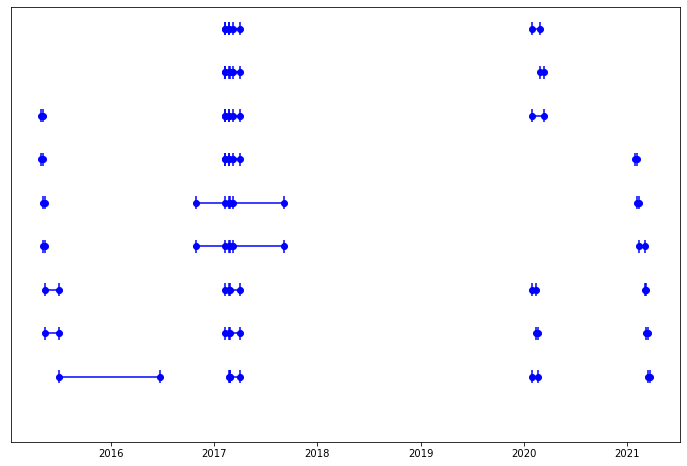

In [109]:
f, ax = plt.subplots(figsize = (12,8))
s = 0.3
j = 0
for i, r in df.iterrows():
    if i % 10 != 0:
        j += 1
        y = s + j/5
    else:
        j = 0
        y = s
    ax.errorbar([r.start, r.end], [y, y], marker = 'o', color = 'blue', yerr = [0.03])
ax.set_ylim(0,2)
ax.yaxis.set_visible(False)